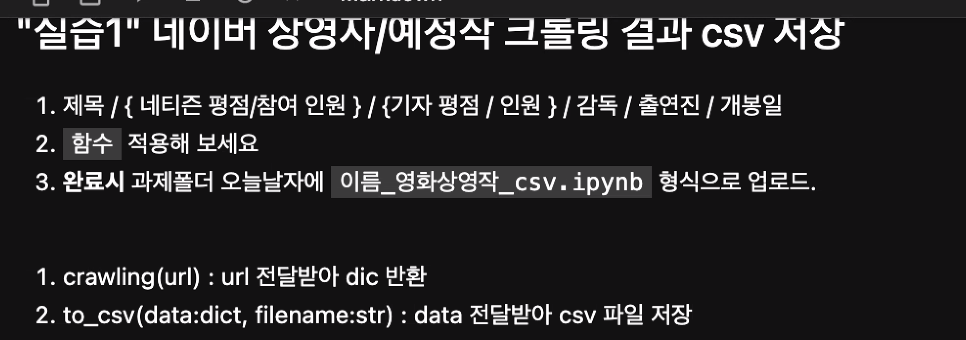

### 영화 상영예정작
1. 제목/{네티즌평점/참여인원}/기자평점/인원}/감독/출연진/개봉일
1. 이름_영화상영예정'

In [46]:
def to_csv(data:list, filename:str): # data 전달받아 csv 파일 저장
    import csv
    with open(filename,'w',newline='',encoding='utf-8') as csvfile:
        s_writer = csv.writer(csvfile)
        s_writer.writerow(['제목','네티즌평점','기자평점','네티즌참여','기자참여','감독','출연진']) 
        for m in movie_rank:
            values = m.values()
            s_writer.writerow(values)
        print(filename+"파일이 저장되었습니다.") 

In [47]:
def crawling(url:str):
    import requests
    from bs4 import BeautifulSoup
    
    response = requests.get(s)
    
    soup = BeautifulSoup(response.text)
    movie = soup.find_all('dl',{'class':'lst_dsc'})
    
    n = 1
    movie_rank = []
    for i in movie: 
        movie_info={} 
        actor=[]
        movie_info["제목"] = i.select('#content > div.article > div > div.lst_wrap > ul > li:nth-child(n) > dl > dt > a')[0].text
    
        p_list = i.find_all('span',{'class':'num'})
        movie_info["네티즌평점"]=p_list[0].text
        if len(p_list) == 2:
            movie_info["기자평점"]=p_list[1].text
    
        p_list = i.find_all('em')
        movie_info["네티즌참여"]=p_list[0].text
        if len(p_list) == 2:
            movie_info["기자참여"]=p_list[1].text

        movie_info["감독"] = i.select('#content > div.article > div > div.lst_wrap > ul > li:nth-child(n) > dl > dd:nth-child(3) > dl > dd:nth-child(4) > span > a')[0].text
        temp = i.select('#content > div.article > div > div.lst_wrap > ul > li:nth-child(n) > dl > dd:nth-child(3) > dl > dd:nth-child(6) > span > a')
        for i in temp:
            actor.append(i.text)
        movie_info["출연진"]=actor
        #movie_info["개봉일"] = i.select('id="content"]/div[1]/div/div[3]/ul/li[14]/dl/dd[2]/dl/dd[1]/text()[2]
        n += 1
        movie_rank.append(movie_info)
    

In [48]:
if __name__ == '__main__':
    s = 'https://movie.naver.com/movie/running/current.naver'
    
    crawling(s)
    
    to_csv(movie_rank, "data/movie_open.csv")


data/movie_open.csv파일이 저장되었습니다.
